In [92]:
import json
from IPython.display import HTML
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from ipywidgets import interact
file_name="afjorddance"
skeleton_fn= file_name+"_skeleton.json"
#a list of poses
with open(skeleton_fn) as file:
    sj_json = json.load(file)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)

(18, 2)


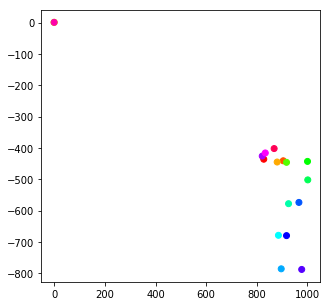

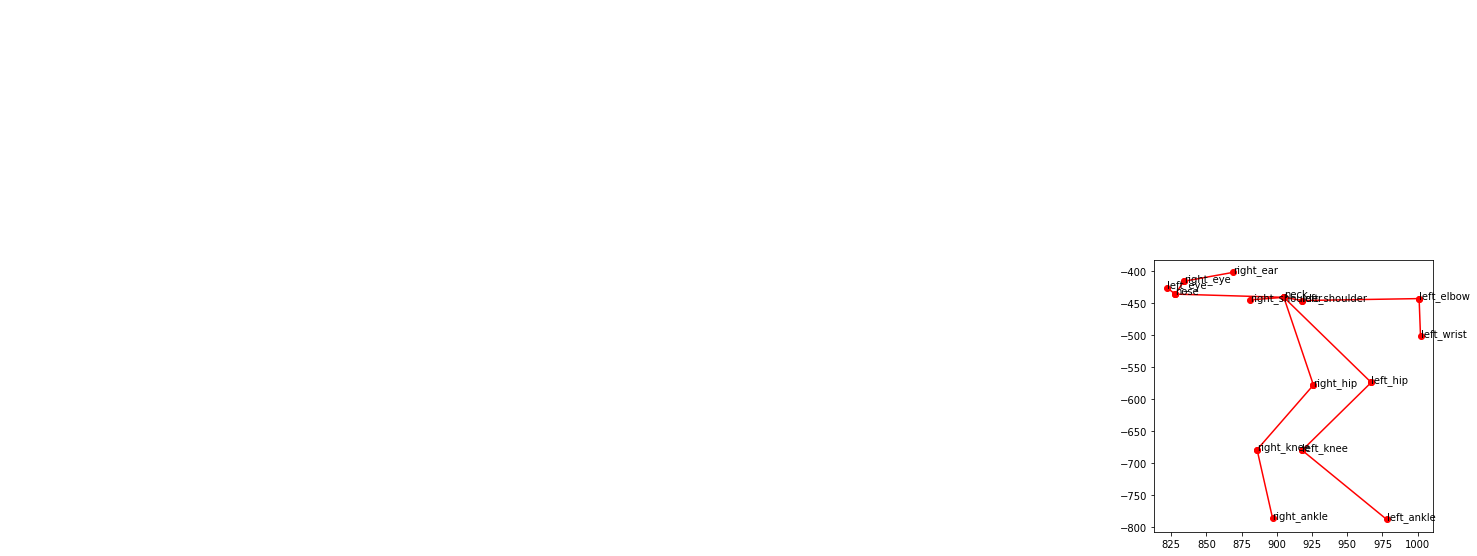

In [100]:
#visualise data
#joint numbers 
skeleton_frames=[body_hand[0] for body_hand in sj_json]
skeleton_frame=np.array(skeleton_frames[0])
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
              [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
              [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
print(skeleton_frame.shape)
len(skeleton_frame.shape)
skeleton_frame[:,1]=-1*skeleton_frame[:,1]

plt.scatter(skeleton_frame[:,0], skeleton_frame[:,1],c=np.array(colors)/255)
limbSeq = [[2, 3], [2, 6], [3, 4], [4, 5], [6, 7], [7, 8], [2, 9], [9, 10], \
               [10, 11], [2, 12], [12, 13], [13, 14], [2, 1], [1, 15], [15, 17], \
               [1, 16], [16, 18], [3, 17], [6, 18]]
keypoints= [
            "nose","neck",
            "right_shoulder","right_elbow","right_wrist",
            "left_shoulder","left_elbow","left_wrist",
            "right_hip","right_knee","right_ankle",
            "left_hip","left_knee","left_ankle",
            "left_eye","right_eye","left_ear","right_ear"
        ]

plt.show()

for i in range(18):
    points=skeleton_frame[np.array(limbSeq[i])-1]
    if  [-1,1] in points:
        continue
    plt.plot(points[:,0], points[:,1], 'ro-')
for i, txt in enumerate(keypoints):
    plt.annotate(txt, skeleton_frame[i])
plt.show()


In [58]:

def test(x):
    frame=np.array(skeleton_frames[x])
    plt.scatter(frame[:,0], -1*frame[:,1],c=np.array(colors)/255)
    plt.show()
interact(test, x=0);
plt.show()

interactive(children=(IntSlider(value=0, description='x', max=1), Output()), _dom_classes=('widget-interact',)…

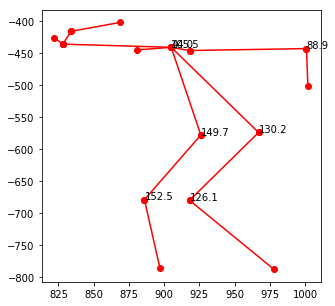

In [112]:
#calculate angles of major joints
def get_angle(a,b,c):
    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)
#angles of interest
#3 joint index to calculate angle
#right knee, right hip, left knee, left hip, right shoulder, right elbow, left shoulder, left elbow
joint_inds=[[10,9,8],[9,8,1],[13,12,11],[12,11,1],[11,1,2],[2,3,4],[11,1,5],[5,6,7]]
angles={}
for joint_ind in joint_inds:
    joints_pos=skeleton_frame[joint_ind]
    if [-1.,1.] in joints_pos:
        continue
    angles[joint_ind[1]]=get_angle(*skeleton_frame[joint_ind])
    plt.annotate(format(angles[joint_ind[1]], ".1f"),skeleton_frame[joint_ind[1]])

for i in range(18):
    points=skeleton_frame[np.array(limbSeq[i])-1]
    if  [-1,1] in points:
        continue
    plt.plot(points[:,0], points[:,1], 'ro-')
    



IndexError: too many indices for array

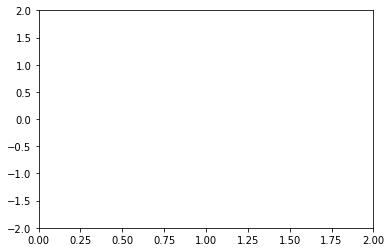

In [37]:
from pythonosc import osc_message_builder
from pythonosc import udp_client

client = udp_client.SimpleUDPClient('localhost', 8998)

#between 20 and 1000
cent_freq = 500 # just adding one amplitude
#between 0.1 and 2
Q = 0.5 # just adding one phase

msg = osc_message_builder.OscMessageBuilder(address = '/parameters')
msg.add_arg(cent_freq, arg_type='f')
msg.add_arg(Q, arg_type='f')
msg = msg.build()
client.send(msg)

                               

[0.23333333 0.59583333 0.6625     1.03958333 1.43333333 0.625
 0.91458333 1.22708333 1.38541667 1.94583333 2.625      1.4375
 1.95208333 2.64583333 0.16875    0.         0.         0.2125
 0.22291667 0.2625    ] [0.49355217 0.49003517 0.62016413 0.73270809 0.87456038 0.36459555
 0.26143025 0.15123095 0.52286049 0.62250879 0.64243845 0.38686987
 0.3880422  0.33645955 0.50762016 0.51113716 0.45017585 0.45134818
 0.56623681 0.41617819]


In [20]:
# rc('animation', html='html5')
# anim


In [ ]:
#TODO calculate angles between joints
#check first constraint knees rolling inside feet